##ГЛУБОКОЕ ОБУЧЕНИЕ НЕЙРОННЫХ СЕТЕЙ

##ЛАБОРАТОРНАЯ РАБОТА №3

Ручная разметка изображений

Цель работы – научится размечать объекты на изображениях для
обучения нейронных сетей глубокого обучения с использованием современных
программных средств.

Задачи:

1. Реализовать нейронную сеть для разметки изображений в соответствии со
своим вариантом индивидуального задания, представленным в
лабораторной работе № 2.

2. Установить программное обеспечение для разметки изображений
https://supervise.ly/

3. Создать новый набор тестовых данных, состоящий из 40 новых
размеченных изображений в программе supervise.

4. Провести валидацию модели, т.е. исследовать точность распознавания
изображений на размеченных данных. В случае достижения точности на
новом тестовом наборе данных менее 60% определить причины этого.

5. В случае недостаточной точности 50% новых изображений включить в
обучающую выборку, дообучить модель и проверить результаты на
оставшемся наборе данных

## Установим необходимые пакеты, в том числе модель нейронной сети

In [18]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
!pip install --upgrade tensorflow==2.5.0

--2023-03-25 20:38:43--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   239MB/s    in 1.7s    

2023-03-25 20:38:45 (239 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.1’ saved [430460776/430460776]

(Reading database ... 128285 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gnu

Загрузим готовую модель maskrcnn

In [19]:
!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
!unzip maskrcnn_colab_demo_commit_17.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2023-03-25 20:40:20--  https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
Resolving pysource.com (pysource.com)... 172.67.180.33, 104.21.67.193, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|172.67.180.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59340 (58K) [application/zip]
Saving to: ‘maskrcnn_colab_demo_commit_17.zip.1’

maskrcnn_colab_demo 100%[===================>]  57.95K  --.-KB/s    in 0.01s   

2023-03-25 20:40:21 (5.40 MB/s) - ‘maskrcnn_colab_demo_commit_17.zip.1’ saved [59340/59340]

Archive:  maskrcnn_colab_demo_commit_17.zip
replace maskrcnn_colab/mrcnn_demo/config.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
replace maskrcnn_colab/mrcnn_demo/model.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
replace maskrcnn_colab/mrcnn_demo/m_rcnn.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: maskrcnn_c

##Загрузим загатовленный датасет

Из заготовленного датасета формата COCO архивируем папку с изображениями и присвоим путь к этой папке переменной images_path.

Json файл с аннтоациями масок присвоим переменной annotations_path

с помощью команды extract_images извлечем изображения и соотвествующие им метки


In [20]:
images_path = "/content/images.zip"
annotations_path = "/content/instances.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 15 images


Разделим датасет на тренировочную часть и проверочную

In [21]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/instances.json
Annotation json path:  /content/instances.json
Train: 14
Validation: 1
Classes: 1


Покажем некоторые изображение вместе с масками из dataset_train

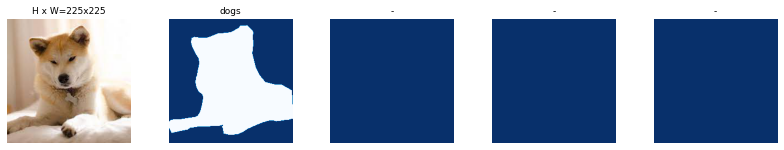

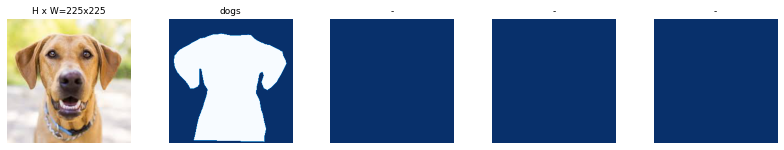

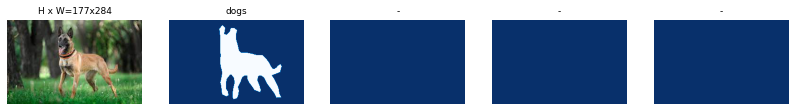

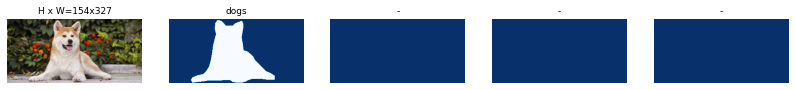

In [22]:
display_image_samples(dataset_train)

##Обучим нейросеть

In [23]:
config = CustomConfig(class_number)
model = load_training_model(config)

/content/maskrcnn_colab/mask_rcnn_coco.h5


In [24]:
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230325T2041/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

ERROR:root:Error processing image {'id': 289302686, 'source': 'coco_like', 'path': '/content/dataset/2.jpg', 'width': 225, 'height': 225, 'annotations': [{'segmentation': [[0.0, 186.0, 3.0, 183.0, 7.0, 182.0, 23.0, 181.0, 35.0, 179.0, 48.0, 177.0, 52.0, 175.0, 57.0, 167.0, 60.0, 154.0, 62.0, 142.0, 61.0, 137.0, 54.0, 131.0, 50.0, 124.0, 48.0, 114.0, 49.0, 106.0, 51.0, 101.0, 52.0, 94.0, 55.0, 80.0, 54.0, 71.0, 48.0, 62.0, 42.0, 49.0, 40.0, 42.0, 41.0, 34.0, 46.0, 32.0, 58.0, 34.0, 67.0, 34.0, 76.0, 31.0, 88.0, 26.0, 99.0, 25.0, 108.0, 24.0, 113.0, 23.0, 126.0, 16.0, 129.0, 12.0, 141.0, 11.0, 143.0, 13.0, 151.0, 21.0, 152.0, 24.0, 151.0, 32.0, 152.0, 43.0, 151.0, 56.0, 150.0, 62.0, 153.0, 73.0, 156.0, 86.0, 160.0, 95.0, 164.0, 102.0, 174.0, 114.0, 190.0, 118.0, 204.0, 119.0, 222.0, 129.0, 224.0, 163.0, 224.0, 180.0, 217.0, 182.0, 208.0, 183.0, 202.0, 184.0, 194.0, 185.0, 188.0, 183.0, 180.0, 184.0, 169.0, 187.0, 157.0, 192.0, 141.0, 199.0, 134.0, 204.0, 125.0, 208.0, 118.0, 209.0, 107.0

Epoch 1/5


ValueError: ignored

##С помощью весов, полученных в ходе обучения тренировочной модели обучим тестовую модель и проверим на случайном изображении, как будет выглядеть силуэт 

In [ ]:
test_model, inference_config = load_test_model(class_number)

In [ ]:
test_random_image(test_model, dataset_val, inference_config)

Верхнее изображение получено с помощью нейросети, нижнее исходное. Видно, что силуэт полученный нейросетью практически совпадает с изначальным вариантом.